# Continuous Systolic and Diastolic Blood Pressure Estimation Utilizing Long Short-term Memory Network

Using ECG and PPG signals to predict Systolic and Diastolic Blood Pressure

## Step 1: Load Preprocessed Data

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import os
import math
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import h5py
import numpy as np

In [2]:
# f = h5py.File('Part_1.mat','r')
# data2get = f.get('Part_1')[:]

# data = np.zeros([data2get.shape[0]])
# for i in range(data2get.shape[0]):
#     data[i]  = np.array(f[data2get[0][i]])[0][0]

In [3]:
M1 = scipy.io.loadmat('part_1.mat')['p'][0]

In [4]:
M1 = M1[:84]

In [5]:
M1.shape

(84,)

### Try plot PPG, ECG and ABP signals (Using data from user 1)

In [6]:
sub = 1

In [7]:
ex_ppg = M1[sub][0][0:400]
ex_ecg = M1[sub][2][0:400]
ex_abp = M1[sub][1][0:400]

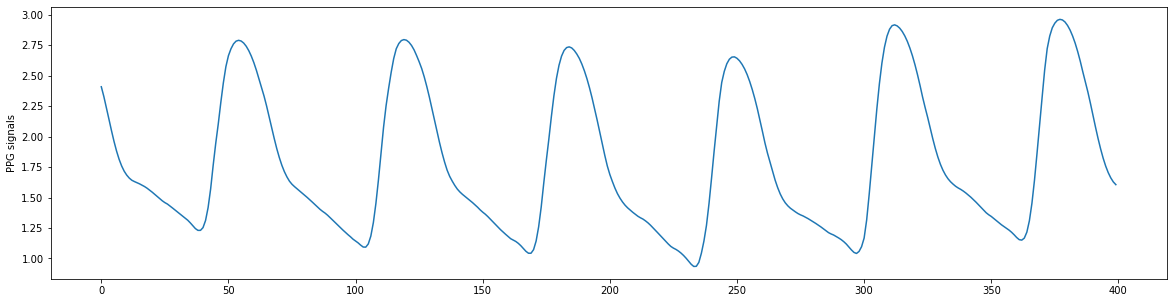

In [8]:
plt.figure(figsize=(20,5))
plt.plot(ex_ppg)
plt.ylabel('PPG signals')
plt.show()

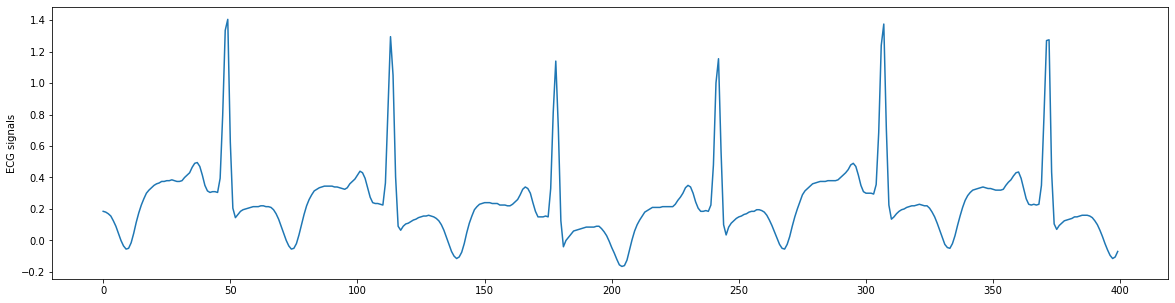

In [9]:
plt.figure(figsize=(20,5))
plt.plot(ex_ecg)
plt.ylabel('ECG signals')
plt.show()

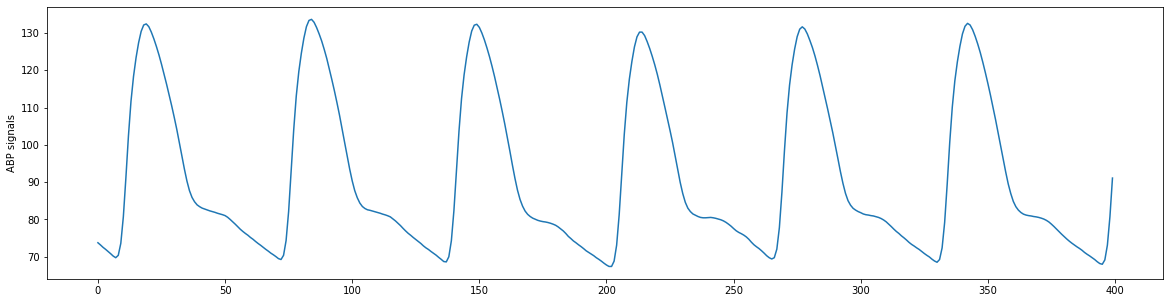

In [10]:
plt.figure(figsize=(20,5))
plt.plot(ex_abp)
plt.ylabel('ABP signals')
plt.show()

## Step 2: Apply Zero-order Holding First Algorithm

To extract Systolic and Diastolic BP for ABP

In [11]:
import numpy as np

In [12]:
# split testset here!!!!
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
import random
random.seed(0)

In [13]:
ppg_ecg = []
for i in range(M1.shape[0]):
#     if M[i][0].shape[0] < MAX_SEQ:
#         p = M[i][0]
#         for j in range(M[i][0].shape[0], MAX_SEQ):
#             p = np.append(p, 0)
#         e = M[i][1]
#         for j in range(M[i][1].shape[0], MAX_SEQ):
#             e = np.append(e, 0)
#     else:
#         p = M[i][0][:MAX_SEQ]
#         e = M[i][1][:MAX_SEQ]
    ppg_ecg.append([M1[i][0], M1[i][2]])

In [14]:
# for i in range(M2.shape[0]):
# #     if M[i][0].shape[0] < MAX_SEQ:
# #         p = M[i][0]
# #         for j in range(M[i][0].shape[0], MAX_SEQ):
# #             p = np.append(p, 0)
# #         e = M[i][1]
# #         for j in range(M[i][1].shape[0], MAX_SEQ):
# #             e = np.append(e, 0)
# #     else:
# #         p = M[i][0][:MAX_SEQ]
# #         e = M[i][1][:MAX_SEQ]
#     ppg_ecg.append([M2[i][0], M2[i][1]])

In [15]:
# for i in range(M3.shape[0]):
# #     if M[i][0].shape[0] < MAX_SEQ:
# #         p = M[i][0]
# #         for j in range(M[i][0].shape[0], MAX_SEQ):
# #             p = np.append(p, 0)
# #         e = M[i][1]
# #         for j in range(M[i][1].shape[0], MAX_SEQ):
# #             e = np.append(e, 0)
# #     else:
# #         p = M[i][0][:MAX_SEQ]
# #         e = M[i][1][:MAX_SEQ]
#     ppg_ecg.append([M3[i][0], M3[i][1]])

In [16]:
ppg_ecg = np.array(ppg_ecg)

In [17]:
ppg_ecg.shape

(84, 2)

In [18]:
abp = []
for i in range(M1.shape[0]):
#     if M[i][2].shape[0] < MAX_SEQ:
#         a = M[i][2]
#         for j in range(M[i][2].shape[0], MAX_SEQ):
#             a = np.append(a, 0)
#     else:
#         a = M[i][2][:MAX_SEQ]
    abp.append(M1[i][1])

In [19]:
# for i in range(M2.shape[0]):
# #     if M[i][2].shape[0] < MAX_SEQ:
# #         a = M[i][2]
# #         for j in range(M[i][2].shape[0], MAX_SEQ):
# #             a = np.append(a, 0)
# #     else:
# #         a = M[i][2][:MAX_SEQ]
#     abp.append(M2[i][2])

In [20]:
# for i in range(M3.shape[0]):
# #     if M[i][2].shape[0] < MAX_SEQ:
# #         a = M[i][2]
# #         for j in range(M[i][2].shape[0], MAX_SEQ):
# #             a = np.append(a, 0)
# #     else:
# #         a = M[i][2][:MAX_SEQ]
#     abp.append(M3[i][2])

In [21]:
abp = np.array(abp)

In [22]:
abp.shape

(84,)

Training set 68%

In [23]:
train_per = int(abp.shape[0] * 80 / 100)

In [24]:
train_per

67

Test set 12%

In [25]:
test_per = int(abp.shape[0] * 20 / 100)

In [26]:
test_per

16

In [27]:
def convert_2d(x, index):
    X = []
    for user_i in range(x.shape[0]):
        X.extend(x[user_i][index])
    return np.array(X)

In [28]:
def convert_2d_train(x):
    X = []
    for user_i in range(x.shape[0]):
        X.extend(x[user_i])
    return np.array(X)

In [29]:
ppg_con = convert_2d(M1, 0)
ecg_con = convert_2d(M1, 2)
abp_con = convert_2d(M1, 1)

In [30]:
ppg_all_min = np.min(ppg_con)
ppg_all_max = np.max(ppg_con)
ecg_all_min = np.min(ecg_con)
ecg_all_max = np.max(ecg_con)
abp_all_min = np.min(abp_con)
abp_all_max = np.max(abp_con)

In [31]:
abp_all_min

50.06520687920365

In [32]:
abp_all_max

183.10659922279336

In [33]:
sort_index = np.argsort([i.shape[0] for i in abp])

In [34]:
ppg_ecg = np.array([ppg_ecg[i] for i in sort_index])
abp = np.array([abp[i] for i in sort_index])

In [35]:
X_cross, X_test, y_cross, y_test = ppg_ecg[test_per:], ppg_ecg[:test_per], abp[test_per:], abp[:test_per]

In [36]:
np.save('x_test.npy', X_test)
np.save('y_test.npy', y_test)

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cross, y_cross, test_size=0.15, random_state=2)

In [38]:
X_train.shape

(57, 2)

In [39]:
def to_timeseries(X, y, is_train):
    """
    generate data for one user.
    """
    seq_x = []
    seqs_x = []
    seqs_y = []
    seq_y = []
        
    for i in range(X[0].shape[0]):
        if len(seq_x) < max_len:
            if is_train:
                seq_x.append([(X[0][i]-ppg_train_min)/(ppg_train_max-ppg_train_min), (X[1][i]-ecg_train_min)/(ecg_train_max-ecg_train_min)])
                seq_y.append([(y[i]-abp_train_min)/(abp_train_max-abp_train_min)])
            else:
                seq_x.append([(X[0][i]-ppg_all_min)/(ppg_all_max-ppg_all_min), (X[1][i]-ecg_all_min)/(ecg_all_max-ecg_all_min)])
                seq_y.append([(y[i]-abp_all_min)/(abp_all_max-abp_all_min)])
        else:
            seq_x = seq_x[1:]
            seq_y = seq_y[1:]
            if is_train:
                seq_x.append([(X[0][i]-ppg_train_min)/(ppg_train_max-ppg_train_min), (X[1][i]-ecg_train_min)/(ecg_train_max-ecg_train_min)])
                seq_y.append([(y[i]-abp_train_min)/(abp_train_max-abp_train_min)])
            else:
                seq_x.append([(X[0][i]-ppg_all_min)/(ppg_all_max-ppg_all_min), (X[1][i]-ecg_all_min)/(ecg_all_max-ecg_all_min)])
                seq_y.append([(y[i]-abp_all_min)/(abp_all_max-abp_all_min)])
        if len(seq_x) < max_len:
            continue
            ls_x = [[0, 0]] * max_len
            ls_x[:len(seq_x)] = seq_x[:]
            ls_x.reverse()
            ls_y = [[0]] * max_len
            ls_y[:len(seq_y)] = seq_y[:]
            ls_y.reverse()
#             seqs_x.append(ls_x)
#             seqs_y.append(ls_y)
        else:
#             if is_train and i > 5000+max_len:
#                 if seq_y[-1][0] > 0.8:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i > 4000+max_len:
#                 if seq_y[-1][0] > 0.7:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i > 3000+max_len:
#                 if seq_y[-1][0] > 0.6:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i > 2000+max_len:
#                 if seq_y[-1][0] > 0.5:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i > 1000+max_len:
#                 if seq_y[-1][0] > 0.4:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i > 400+max_len:
#                 if seq_y[-1][0] > 0.3 or seq_y[-1][0] < 0.5:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train and i < 200+max_len:
#                     seqs_x.append(seq_x)
#                     seqs_y.append(seq_y)
#             elif is_train == False:
            seqs_x.append(seq_x)
            seqs_y.append(seq_y)
    zeros_y = np.zeros((len(seqs_y), max_len, 1))
    return seqs_x, seqs_y, zeros_y

In [40]:
def slice_ls(X, y, max_seq, start_index):
    if X[0].shape[0] <= start_index:
        return [], []
    m = X[0][start_index:max_seq+start_index]
    n = X[1][start_index:max_seq+start_index]
    p = y[start_index:max_seq+start_index]
    return [m, n], p

In [41]:
kf = KFold(n_splits=5, random_state=42)

In [42]:
from keras.layers import Dense, CuDNNLSTM, Dropout, Activation, Input, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, Sequential
from keras import backend as K
import tensorflow as tf
import keras

Using TensorFlow backend.


In [43]:
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [50]:
keras.backend.clear_session()

layers = [128, 128] # Number of hidden neuros in each layer of the encoder and decoder

learning_rate = 0.001
decay = 0 # Learning rate decay
optimiser = keras.optimizers.Adam(lr=learning_rate, decay=decay) # Other possible optimiser "sgd" (Stochastic Gradient Descent)

num_input_features = 2 # The dimensionality of the input at each time step. In this case a 1D signal.
num_output_features = 1 # The dimensionality of the output at each time step. In this case a 1D signal.
# There is no reason for the input sequence to be of same dimension as the ouput sequence.
# For instance, using 3 input signals: consumer confidence, inflation and house prices to predict the future house prices.

loss = rmse # Other loss functions are possible, see Keras documentation.

# Regularisation isn't really needed for this application
lambda_regulariser = 0.001 # Will not be used if regulariser is None
regulariser = keras.regularizers.l2(lambda_regulariser)# Possible regulariser: keras.regularizers.l2(lambda_regulariser)
regulariser = None
batch_size = 512
steps_per_epoch = 1000000 # batch_size * steps_per_epoch = total number of training examples
epochs = 15

input_sequence_length = 32 # Length of the sequence used by the encoder
target_sequence_length = 32 # Length of the sequence predicted by the decoder
num_steps_to_predict = 32 # Length to use when testing the model

num_signals = 2 # The number of random sine waves the compose the signal. The more sine waves, the harder the problem.

In [51]:
# Define an input sequence.
encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

# Create a list of RNN Cells, these are then concatenated into a single layer
# with the RNN layer.
encoder_cells = []
for hidden_neurons in layers:
    encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

# Discard encoder outputs and only keep the states.
# The outputs are of no interest to us, the encoder's
# job is to create a state describing the input sequence.
encoder_states = encoder_outputs_and_states[1:]

In [52]:
# The decoder input will be set to zero (see random_sine function of the utils module).
# Do not worry about the input size being 1, I will explain that in the next cell.
decoder_inputs = keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

# Set the initial state of the decoder to be the ouput state of the encoder.
# This is the fundamental part of the encoder-decoder.
decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

# Only select the output of the decoder (not the states)
decoder_outputs = decoder_outputs_and_states[0]

# Apply a dense layer with linear activation to set output to correct dimension
# and scale (tanh is default activation for GRU in Keras, our output sine function can be larger then 1)
decoder_dense = keras.layers.Dense(num_output_features,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

In [53]:
# Create a model using the functional API provided by Keras.
# The functional API is great, it gives an amazing amount of freedom in architecture of your NN.
# A read worth your time: https://keras.io/getting-started/functional-api-guide/ 
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint('model-s25-u32-new-dataset.h5', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=True)
]
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.compile(optimizer=optimiser, loss=loss)

In [186]:
max_len = 32

con_train = convert_2d_train(y_train)
ppg_con_train = convert_2d(X_train, 0)
ecg_con_train = convert_2d(X_train, 1)

abp_train_min = np.min(con_train)
abp_train_max = np.max(con_train)
ppg_train_min = np.min(ppg_con_train)
ppg_train_max = np.max(ppg_con_train)
ecg_train_min = np.min(ecg_con_train)
ecg_train_max = np.max(ecg_con_train)

encoder_input = []
decoder_output = []
decoder_input = []
for i in range(X_train.shape[0]):
    s_x, s_y, z_y = to_timeseries(X_train[i], y_train[i], is_train=True)
    encoder_input.extend(s_x)
    decoder_output.extend(s_y)
    decoder_input.extend(z_y)
encoder_input = np.array(encoder_input)
decoder_output = np.array(decoder_output)
decoder_input = np.array(decoder_input)
print('done convert trainset to timeseries')

encoder_input_valid = []
decoder_output_valid = []
decoder_input_valid = []
for i in range(X_valid.shape[0]):
    s_x, s_y, z_y = to_timeseries(X_valid[i], y_valid[i], is_train=False)
    encoder_input_valid.extend(s_x)
    decoder_output_valid.extend(s_y)
    decoder_input_valid.extend(z_y)
encoder_input_valid = np.array(encoder_input_valid)
decoder_output_valid = np.array(decoder_output_valid)
decoder_input_valid = np.array(decoder_input_valid)
print('done convert validset to timeseries')

history = model.fit([encoder_input, decoder_input], decoder_output, batch_size=batch_size, epochs=epochs, shuffle=True,
          validation_data=([encoder_input_valid, decoder_input_valid], decoder_output_valid),
          callbacks=callbacks)

done convert trainset to timeseries
done convert validset to timeseries
Train on 595473 samples, validate on 135907 samples
Epoch 1/15
 14848/595473 [..............................] - ETA: 3:43 - loss: 0.0454

KeyboardInterrupt: 

## Step 4: Create LSTM Network
Skip step 4-5 if you've already train model

In [57]:
np.save('x_main.npy', X_cross)
np.save('y_main.npy', y_cross)

In [58]:
abp_train_min

50.26078895748954

In [59]:
abp_train_max

161.91820566298546

## Step 6: Training Evaluation

In [60]:
# y_test_predicted = predict(encoder_input_valid, encoder_predict_model, decoder_predict_model, num_steps_to_predict)

In [61]:
# model = load_model('model-s25-u32.h5', custom_objects={'rmse': rmse})

In [62]:
# from last fold
y_test_predicted = model.predict([encoder_input_valid, decoder_input_valid],
                                batch_size=batch_size, verbose=1)

135907/135907 [==============================] - 10s 76us/step


In [63]:
pred = []
gt = []
for i in range(y_test_predicted.shape[0]):
    pred.append(y_test_predicted[i][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)
    gt.append(decoder_output_valid[i][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)

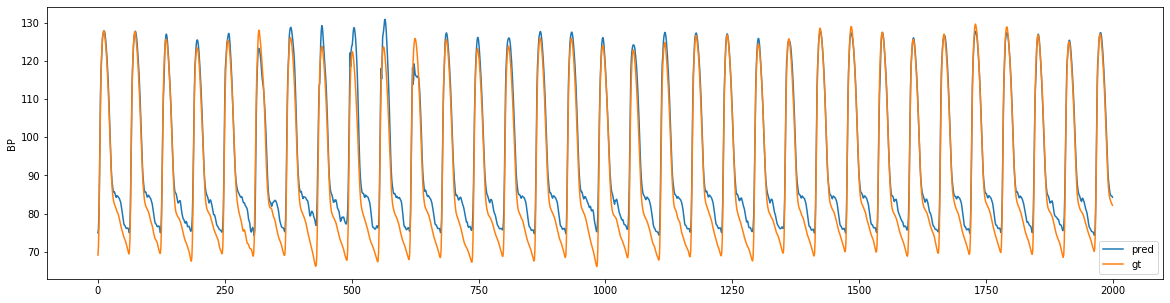

In [66]:
plt.figure(figsize=(20,5))
plt.plot(pred[10000:12000], label='pred')
# plt.plot(pred_dia)
plt.plot(gt[10000:12000], label='gt')
# plt.plot(gt_dia)
plt.ylabel('BP')
plt.legend()
plt.show()

In [48]:
model.load_weights('model-s25-u64-all-new_dataset.h5')

In [49]:
max_len = 32

con_train = convert_2d_train(y_train)
ppg_con_train = convert_2d(X_train, 0)
ecg_con_train = convert_2d(X_train, 1)

abp_train_min = np.min(con_train)
abp_train_max = np.max(con_train)
ppg_train_min = np.min(ppg_con_train)
ppg_train_max = np.max(ppg_con_train)
ecg_train_min = np.min(ecg_con_train)
ecg_train_max = np.max(ecg_con_train)

encoder_input = []
decoder_output = []
decoder_input = []
for i in range(X_cross.shape[0]):
    s_x, s_y, z_y = to_timeseries(X_cross[i], y_cross[i], is_train=True)
    encoder_input.extend(s_x)
    decoder_output.extend(s_y)
    decoder_input.extend(z_y)
encoder_input = np.array(encoder_input)
decoder_output = np.array(decoder_output)
decoder_input = np.array(decoder_input)
print('done convert trainset to timeseries')

encoder_input_valid = []
decoder_output_valid = []
decoder_input_valid = []
for i in range(X_valid.shape[0]):
    s_x, s_y, z_y = to_timeseries(X_test[i], y_test[i], is_train=False)
    encoder_input_valid.extend(s_x)
    decoder_output_valid.extend(s_y)
    decoder_input_valid.extend(z_y)
encoder_input_valid = np.array(encoder_input_valid)
decoder_output_valid = np.array(decoder_output_valid)
decoder_input_valid = np.array(decoder_input_valid)
print('done convert validset to timeseries')

history = model.fit([encoder_input, decoder_input], decoder_output, batch_size=batch_size, epochs=5, shuffle=True,
          validation_data=([encoder_input_valid, decoder_input_valid], decoder_output_valid),
          callbacks=callbacks)
model.save_weights('model-s84-u128-all-new_dataset.h5')

done convert trainset to timeseries


W1209 19:54:48.959089 140219797419776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


done convert validset to timeseries
Train on 1934892 samples, validate on 10659 samples
Epoch 1/5
1934892/1934892 [==============================] - 459s 237us/step - loss: 0.0306 - val_loss: 0.0408
Epoch 2/5
1934892/1934892 [==============================] - 454s 235us/step - loss: 0.0302 - val_loss: 0.0414
Epoch 3/5
1934892/1934892 [==============================] - 470s 243us/step - loss: 0.0296 - val_loss: 0.0421


## Step 7: Apply Zero-order Holding Second Algorithm

In [206]:
from keras import backend as K
from keras.models import load_model

In [207]:
max_len = 32

In [208]:
# def rmse (y_true, y_pred):
#     return K.sqrt(K.mean(K.square(y_pred - y_true)))

load our pre-train model

In [54]:
model.load_weights('model-s25-u32-new-dataset.h5')

In [55]:
def to_timeseries(X, y):
    """
    generate data for one user.
    """
    seq_x = []
    seqs_x = []
    seqs_y = []
    for i in range(X[0].shape[0]):
        if len(seq_x) < max_len:
            seq_x.append([(X[0][i]-ppg_all_min)/(ppg_all_max-ppg_all_min), (X[1][i]-ecg_all_min)/(ecg_all_max - ecg_all_min)])
        else:
            seq_x = seq_x[1:]
            seq_x.append([(X[0][i]-ppg_all_min)/(ppg_all_max-ppg_all_min), (X[1][i]-ecg_all_min)/(ecg_all_max - ecg_all_min)])
        if len(seq_x) < max_len:
            ls_x = [[0, 0]] * max_len
            ls_x[:len(seq_x)] = seq_x[:]
            ls_x.reverse()
#             seqs_x.append(ls_x)
        else:
            seqs_x.append(seq_x)
            if y[i] == 0:
                seqs_y.append(0)
            else:
                seqs_y.append((y[i]-abp_all_min)/(abp_all_max-abp_all_min))
        
    return seqs_x, seqs_y

In [56]:
user_test = 4

In [57]:
test_x, _ = to_timeseries(X_test[user_test], y_test[user_test])

In [58]:
ground_truth_x, ground_truth_y = to_timeseries(X_test[user_test], y_test[user_test])

In [59]:
# y_test_predicted = predict(np.array(test_x), encoder_predict_model, decoder_predict_model, num_steps_to_predict=16)

In [60]:
y_test_predicted = model.predict([np.array(test_x), np.zeros((len(ground_truth_y), max_len, 1))],
                                batch_size=batch_size, verbose=1)

969/969 [==============================] - 0s 242us/step


In [61]:
y_test_predicted.shape

(969, 32, 1)

In [62]:
len(ground_truth_y)

969

In [63]:
pred_abp = []
gt_abp = []

In [64]:
for i in range(y_test_predicted.shape[0]):
    pred_abp.append(y_test_predicted[i][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)
    gt_abp.append(ground_truth_y[i]*(abp_all_max-abp_all_min)+abp_all_min)

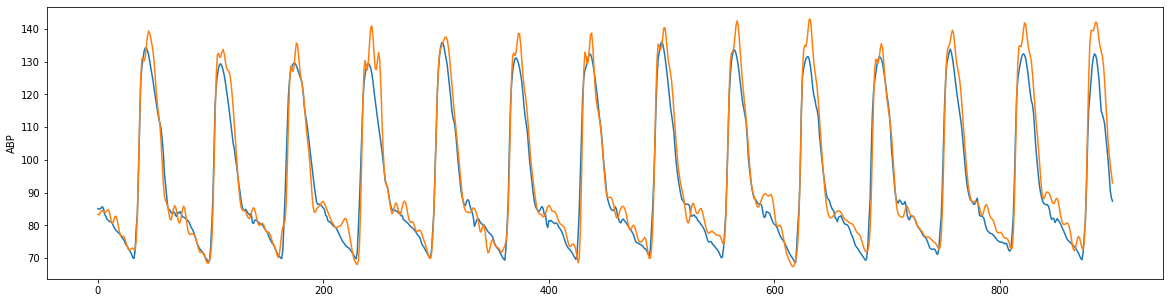

In [65]:
plt.figure(figsize=(20,5))
plt.plot(pred_abp[68:1000])
# plt.plot(pred_dia)
plt.plot(gt_abp[68:1000])
# plt.plot(gt_dia)
plt.ylabel('ABP')
plt.show()

In [66]:
def find_abp_peak_sys(abp, delay):
    global max_systolic
    index_max_abp = []
    loop_count = int(len(abp)/delay)
    index = 0
    for i in range(loop_count):
        max_value = 0
        max_index = 0
        for j in abp[i*delay:(i+1)*delay]:
            if j > max_value:
                max_value = j
                max_index = index
                
            index = index + 1
        index_max_abp.append(max_index)
    
    return index_max_abp

In [67]:
def find_abp_peak_dia(abp, delay):
    global max_diastolic
    index_min_abp = []
    loop_count = int(len(abp)/delay)
    index = 0
    j_value = []
    for i in range(loop_count):
        min_value = 9999999999
        min_index = 0
        for j in abp[i*delay:(i+1)*delay]:
            if j < min_value:
                min_value = j
                min_index = index
            index = index + 1
        
        index_min_abp.append(min_index)
        j_value.append(min_value)
    return index_min_abp

In [68]:
def zero_order_holding_first(abp, delay, is_sys):
    if is_sys:
        index_max_abp = find_abp_peak_sys(abp, delay)
    else:
        index_max_abp = find_abp_peak_dia(abp, delay)
    peak_abp = np.zeros(len(abp))
    
    j = 0
    for i in range(len(abp)):
        if i < index_max_abp[j]:
            if j == 1:
                peak_abp[i] = abp[index_max_abp[0]]
            else:
                peak_abp[i] = abp[index_max_abp[j-1]]
        else:
            j = j + 1
            if j >= len(index_max_abp):
                j = j - 1
            if j == 1:
                peak_abp[i] = abp[index_max_abp[0]]
            else:
                peak_abp[i] = abp[index_max_abp[j-1]]
            
    return peak_abp

In [69]:
pred_sys = zero_order_holding_first(pred_abp, delay=100, is_sys=True)
gt_sys = zero_order_holding_first(gt_abp, delay=100, is_sys=True)

In [70]:
pred_dia = zero_order_holding_first(pred_abp, delay=100, is_sys=False)
gt_dia = zero_order_holding_first(gt_abp, delay=100, is_sys=False)

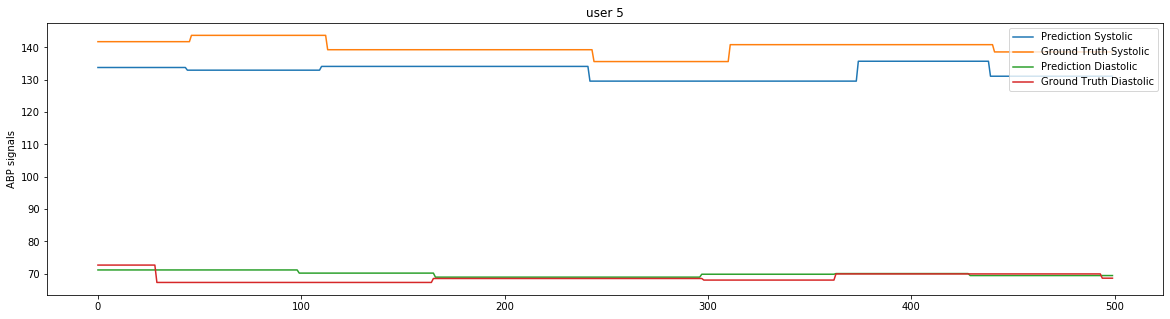

In [71]:
plt.figure(figsize=(20,5))
plt.plot(pred_sys[:500], label='Prediction Systolic')
plt.plot(gt_sys[:500], label='Ground Truth Systolic')
plt.plot(pred_dia[:500], label='Prediction Diastolic')
plt.plot(gt_dia[:500], label='Ground Truth Diastolic')
plt.ylabel('ABP signals')
plt.legend(loc='upper right')
plt.title('user ' + str(user_test+1))
plt.show()

In [72]:
def zero_order_second(signal):
    change = 0
    num = len(signal)
    for i in range(0, num-10):
        counter = 0
        if signal[i+1] != signal[i]:
            change = 1
            for j in range(1, 12):
                if signal[i+j] == signal[i]:
                    counter = counter + 1
        if change == 1 and counter > 0:
            for j in range(0, 11):
                signal[i+j] = signal[i]
        change = 0
    return signal

In [73]:
pred_sys = zero_order_second(pred_sys)
gt_sys = zero_order_second(gt_sys)

In [74]:
pred_dia = zero_order_second(pred_dia)
gt_dia = zero_order_second(gt_dia)

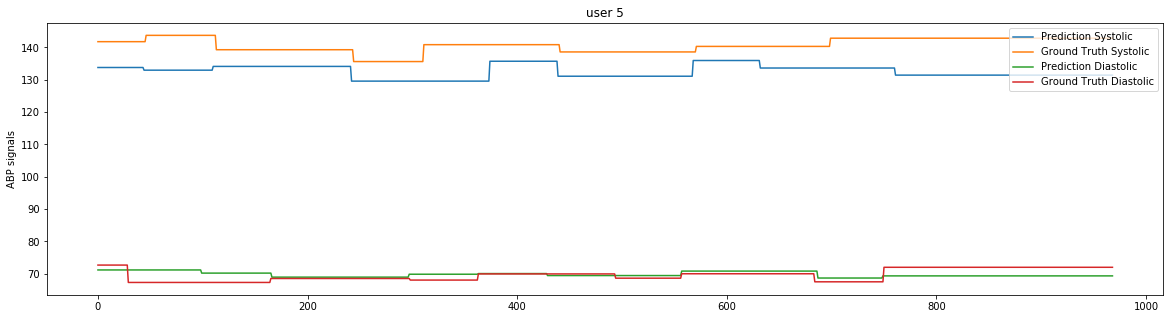

In [75]:
plt.figure(figsize=(20,5))
plt.plot(pred_sys[:], label='Prediction Systolic')
plt.plot(gt_sys[:], label='Ground Truth Systolic')
plt.plot(pred_dia[:], label='Prediction Diastolic')
plt.plot(gt_dia[:], label='Ground Truth Diastolic')
plt.ylabel('ABP signals')
plt.legend(loc='upper right')
plt.title('user ' + str(user_test+1))
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sys = sqrt(mean_squared_error(gt_sys, pred_sys))
rmse_dia = sqrt(mean_squared_error(gt_dia, pred_dia))

In [77]:
rmse_sys

8.525002032385155

In [78]:
rmse_dia

1.959373313619344

In [79]:
pred_sys_ls = []
gt_sys_ls = []
pred_dia_ls = []
gt_dia_ls = []

for i in range(test_per):
    test_x, _ = to_timeseries(X_test[i], y_test[i])
    ground_truth_x, ground_truth_y = to_timeseries(X_test[i], y_test[i])
    y_test_predicted = model.predict([np.array(test_x), np.zeros((len(ground_truth_y), max_len, 1))], 
                                     batch_size=batch_size)
    p_abp = []
    g_abp = []
    for j in range(y_test_predicted.shape[0]):
        p_abp.append(y_test_predicted[j][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)
        g_abp.append(ground_truth_y[j]*(abp_all_max-abp_all_min)+abp_all_min)
        
        
    p_sys = zero_order_holding_first(p_abp, delay=100, is_sys=True)
    g_sys = zero_order_holding_first(g_abp, delay=100, is_sys=True)
    p_dia = zero_order_holding_first(p_abp, delay=100, is_sys=False)
    g_dia = zero_order_holding_first(g_abp, delay=100, is_sys=False)
    
    
    p_sys = zero_order_second(p_sys)
    g_sys = zero_order_second(g_sys)
    p_dia = zero_order_second(p_dia)
    g_dia = zero_order_second(g_dia)
    
    pred_sys_ls.extend(p_sys)
    gt_sys_ls.extend(g_sys)
    pred_dia_ls.extend(p_dia)
    gt_dia_ls.extend(g_dia)
    
    rmse_sys = sqrt(mean_squared_error(gt_sys_ls, pred_sys_ls))
    rmse_dia = sqrt(mean_squared_error(gt_dia_ls, pred_dia_ls))
    
    
    print('subject %d done!!' % (i))
    print('---------------RMSE From %d subjects---------------' % (i+1))
    print('rmse sys: %.6f' % rmse_sys)
    print('rmse dia: %.6f' % rmse_dia)

subject 0 done!!
---------------RMSE From 1 subjects---------------
rmse sys: 4.086220
rmse dia: 1.449874
subject 1 done!!
---------------RMSE From 2 subjects---------------
rmse sys: 5.941639
rmse dia: 2.213068
subject 2 done!!
---------------RMSE From 3 subjects---------------
rmse sys: 7.362581
rmse dia: 2.057667
subject 3 done!!
---------------RMSE From 4 subjects---------------
rmse sys: 7.310812
rmse dia: 1.970697
subject 4 done!!
---------------RMSE From 5 subjects---------------
rmse sys: 7.569247
rmse dia: 1.968437
subject 5 done!!
---------------RMSE From 6 subjects---------------
rmse sys: 8.111710
rmse dia: 3.763482
subject 6 done!!
---------------RMSE From 7 subjects---------------
rmse sys: 7.914182
rmse dia: 4.287441
subject 7 done!!
---------------RMSE From 8 subjects---------------
rmse sys: 7.520184
rmse dia: 4.062623
subject 8 done!!
---------------RMSE From 9 subjects---------------
rmse sys: 7.137999
rmse dia: 3.920476
subject 9 done!!
---------------RMSE From 10 s